# Install dependencies and set up Socrata API

In [2]:
import numpy as np
import pandas as pd
import sodapy
from sodapy import Socrata
import matplotlib.pyplot as plt
from datetime import datetime
client = Socrata("data.cdc.gov", None) #add app token from CDC.gov profile

# COVID-19 Total 7-day Admissions per 100k

In [3]:
results = client.get("7dk4-g6vg", limit = 100000)

In [4]:
full_data=pd.DataFrame.from_records(results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(12903, 12)
week_ending_date                   object
state                              object
avg_adm_all_covid_confirmed        object
pct_chg_avg_adm_all_covid          object
total_adm_all_covid_confirmed      object
total_adm_all_covid_confirmed_1    object
sum_adm_all_covid_confirmed        object
avg_total_patients                 object
avg_percent_inpatient_beds         object
abs_chg_avg_percent_inpatient      object
avg_percent_staff_icu_beds         object
abs_chg_avg_percent_staff          object
dtype: object


Index(['week_ending_date', 'state', 'avg_adm_all_covid_confirmed',
       'pct_chg_avg_adm_all_covid', 'total_adm_all_covid_confirmed',
       'total_adm_all_covid_confirmed_1', 'sum_adm_all_covid_confirmed',
       'avg_total_patients', 'avg_percent_inpatient_beds',
       'abs_chg_avg_percent_inpatient', 'avg_percent_staff_icu_beds',
       'abs_chg_avg_percent_staff'],
      dtype='object')

In [5]:
full_data=full_data.rename({
                 'state':'geo_location',
                 'avg_adm_all_covid_confirmed':'new_adm_7day_avg',
                 'total_adm_all_covid_confirmed':'new_adm_7day_total',
                 'total_adm_all_covid_confirmed_1':'new_adm_7day_total_per100k',
                 'avg_percent_inpatient_beds':'inpatient_bed_occ_7day_avg',
                 'avg_percent_staff_icu_beds':'icu_bed_occ_7day_avg'},axis=1).astype({
                 'new_adm_7day_avg':'float64',
                 'new_adm_7day_total':'float64',
                 'new_adm_7day_total_per100k':'float64',
                 'inpatient_bed_occ_7day_avg':'float64',
                 'icu_bed_occ_7day_avg':'float64'},errors = 'raise')[['week_ending_date','geo_location','new_adm_7day_total_per100k','inpatient_bed_occ_7day_avg','icu_bed_occ_7day_avg']]

In [6]:
full_data['week']=pd.to_datetime(full_data['week_ending_date'])
full_data=full_data.set_index(['week']).drop(columns=['week_ending_date','inpatient_bed_occ_7day_avg','icu_bed_occ_7day_avg'])

In [7]:
case_data=full_data.pivot(columns='geo_location',values = 'new_adm_7day_total_per100k')

In [8]:
#case_data.to_csv('/drive/MyDrive/Documents/latest_covid_adm_data.csv')

In [9]:
us_data=case_data['USA']
us_data.name='New_COVID_7DayADM_rate'
us_data.head()

week
2020-08-08    9.524743
2020-08-15    8.996444
2020-08-22    8.862412
2020-08-29    8.491940
2020-09-05    7.970267
Name: New_COVID_7DayADM_rate, dtype: float64

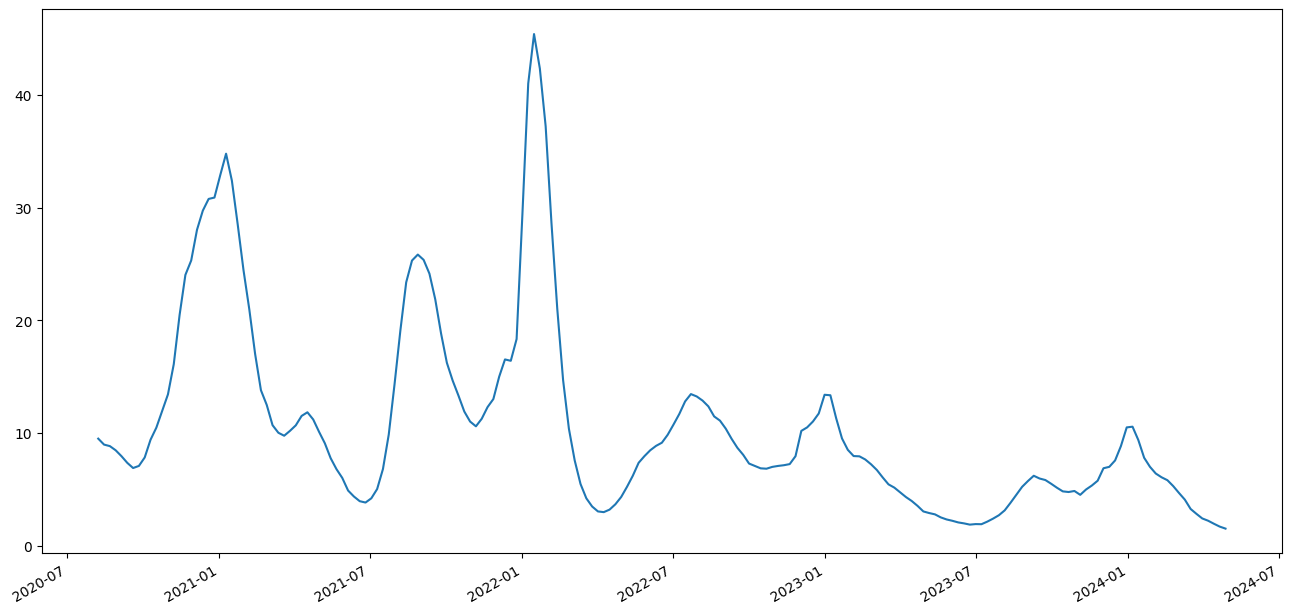

In [10]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(us_data)
fig.autofmt_xdate()

# NSSP ER Visits- COVID, Flu, RSV, Combined percentage of all ER Visits

In [11]:
er_visit_results=client.get('vutn-jzwm', limit = 20000)

In [12]:
full_data=pd.DataFrame.from_records(er_visit_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(20000, 4)
week_end          object
pathogen          object
geography         object
percent_visits    object
dtype: object


Index(['week_end', 'pathogen', 'geography', 'percent_visits'], dtype='object')

In [13]:
full_data=full_data.astype({'percent_visits': 'float64'})

In [14]:
full_data['week']=pd.to_datetime(full_data['week_end'])

In [15]:
rate_data=full_data.loc[(full_data['geography']=='United States')].drop(columns = ['week_end','geography']).set_index(['week'])

In [16]:
er_adm_data= rate_data.pivot(columns = 'pathogen', values='percent_visits')
er_adm_data.head()

pathogen,COVID-19,Combined,Influenza,RSV
week,,,,
2022-10-01,1.8,2.8,0.5,0.5
2022-10-08,1.7,2.9,0.7,0.6
2022-10-15,1.6,3.2,0.9,0.7
2022-10-22,1.6,3.7,1.3,0.8
2022-10-29,1.7,5.1,2.5,1.0


In [17]:
covid_er_data=pd.DataFrame(er_adm_data.iloc[:,0])
covid_er_data.rename(columns={'COVID-19':'ER_adm'},inplace=True)
covid_er_data.head()

,ER_adm
week,
2022-10-01,1.8
2022-10-08,1.7
2022-10-15,1.6
2022-10-22,1.6
2022-10-29,1.7


In [18]:
#er_adm_data.to_csv('/drive/MyDrive/Documents/latest_er_adm_data.csv')

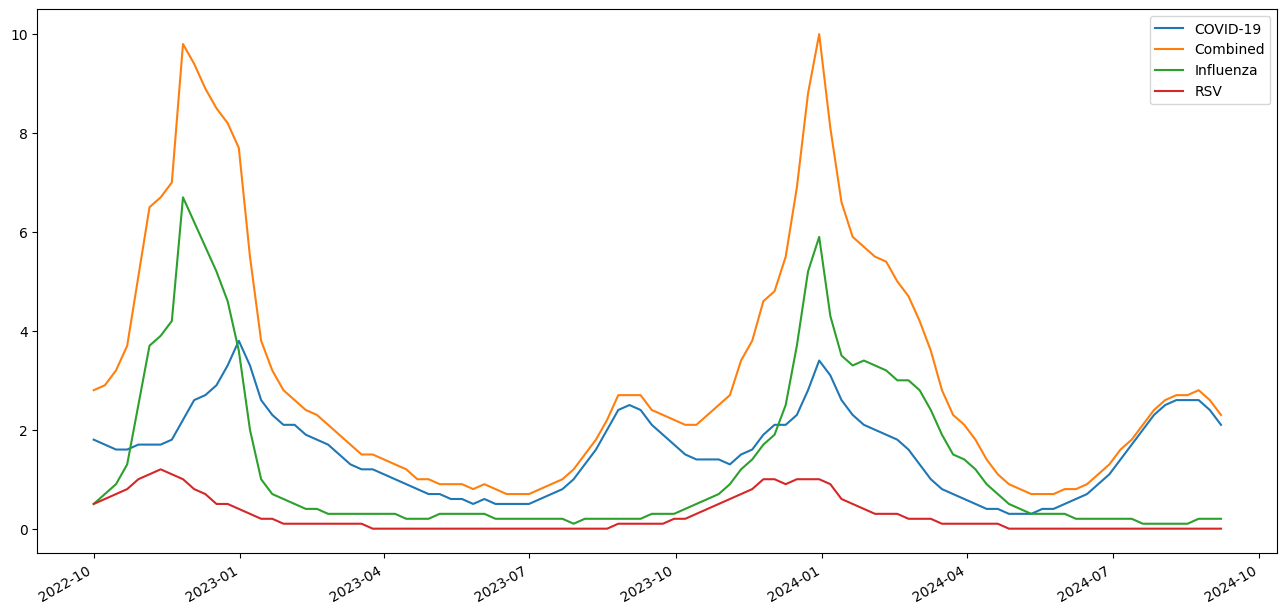

In [19]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(er_adm_data)
fig.autofmt_xdate()
plt.legend(['COVID-19','Combined','Influenza','RSV'], loc='upper right')

# Lab-Confirmed Hospitalizations of the Big Three (Rate per 100k)

In [20]:
lab_results = client.get("kvib-3txy", limit = 100000)

In [21]:
full_data=pd.DataFrame.from_records(lab_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(43418, 12)
surveillance_network    object
season                  object
mmwr_year               object
mmwr_week               object
age_group               object
sex                     object
race_ethnicity          object
site                    object
weekly_rate             object
cumulative_rate         object
_weekenddate            object
type                    object
dtype: object


Index(['surveillance_network', 'season', 'mmwr_year', 'mmwr_week', 'age_group',
       'sex', 'race_ethnicity', 'site', 'weekly_rate', 'cumulative_rate',
       '_weekenddate', 'type'],
      dtype='object')

In [22]:
full_data.head()

,surveillance_network,season,mmwr_year,mmwr_week,age_group,sex,race_ethnicity,site,weekly_rate,cumulative_rate,_weekenddate,type
0,Combined,2023-24,2024.0,38.0,Overall,Overall,Overall,Utah,2.3,250.0,2024-09-21 00:00:00,Unadjusted Rate
1,Combined,2023-24,2024.0,37.0,Overall,Overall,Overall,Utah,3.0,247.0,2024-09-14 00:00:00,Unadjusted Rate
2,Combined,2023-24,2024.0,36.0,Overall,Overall,Overall,Utah,3.984298764938795,244.0,2024-09-07 00:00:00,Unadjusted Rate
3,Combined,2023-24,2024.0,35.0,Overall,Overall,Overall,Utah,3.584298764938795,240.0,2024-08-31 00:00:00,Unadjusted Rate
4,Combined,2023-24,2024.0,34.0,Overall,Overall,Overall,Utah,2.1,237.0,2024-08-24 00:00:00,Unadjusted Rate


In [23]:
filtered_data = full_data.loc[(full_data['race_ethnicity'] == 'Overall') & (full_data['age_group'] == 'Overall') & (full_data['sex'] == 'Overall') & (full_data['site'] == 'Overall')][['surveillance_network','weekly_rate','_weekenddate']]

In [24]:
filtered_data= filtered_data.astype({'weekly_rate' : 'float64'})
filtered_data['week']=pd.to_datetime(filtered_data['_weekenddate'])

In [25]:
rate_data= filtered_data.drop(columns = '_weekenddate').set_index('week').pivot(columns = 'surveillance_network', values='weekly_rate')
rate_data.head()

surveillance_network,COVID-NET,Combined,FluSurv-NET,RSV-NET
week,,,,
2018-10-06,NaN,0.172305,0.072305,0.1
2018-10-13,NaN,0.299850,0.099850,0.2
2018-10-20,NaN,0.303293,0.103293,0.2
2018-10-27,NaN,0.403293,0.103293,0.3
2018-11-03,NaN,0.458383,0.158383,0.3


In [26]:
covid_rate_data=pd.DataFrame(rate_data.iloc[:,0])
#covid_rate_data.rename(columns={'COVID-19':'CTK_pos'},inplace=True)
covid_rate_data.head()

,COVID-NET
week,
2018-10-06,NaN
2018-10-13,NaN
2018-10-20,NaN
2018-10-27,NaN
2018-11-03,NaN


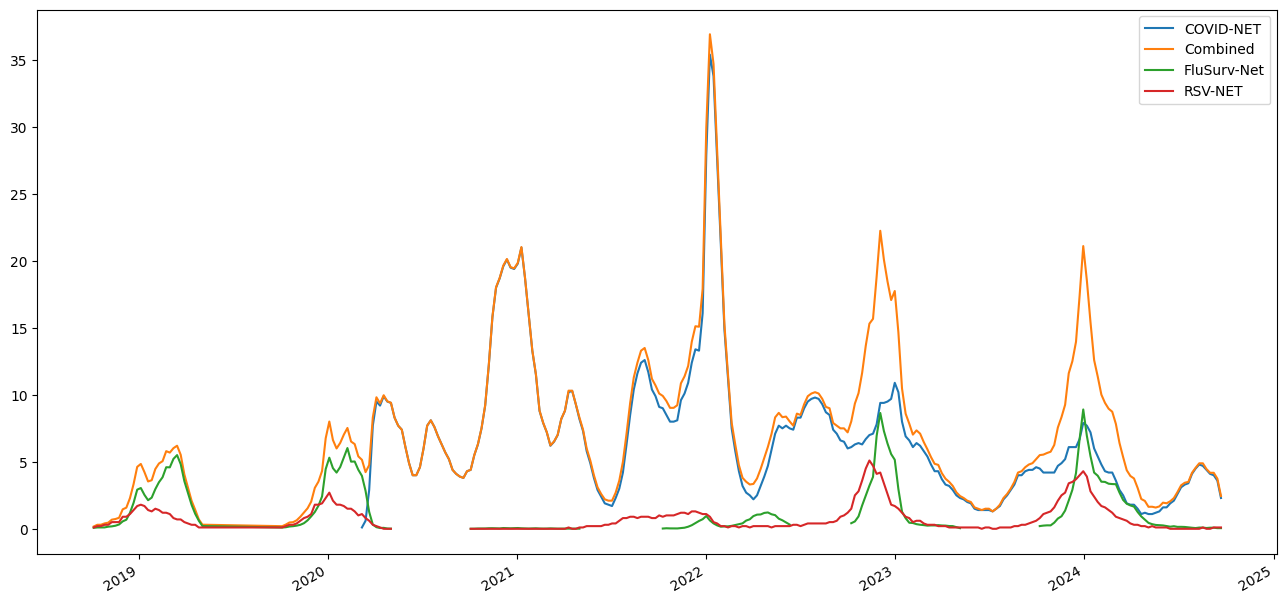

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(rate_data)
fig.autofmt_xdate()
plt.legend(['COVID-NET','Combined','FluSurv-Net', 'RSV-NET'], loc='upper right')

# Percent of Positive Test Results

In [28]:
test_results = client.get("seuz-s2cv", limit = 100000)

In [29]:
full_data=pd.DataFrame.from_records(test_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(312, 3)
week_end                   object
pathogen                   object
percent_test_positivity    object
dtype: object


Index(['week_end', 'pathogen', 'percent_test_positivity'], dtype='object')

In [30]:
full_data= full_data.astype({'percent_test_positivity' : 'float64'})
full_data['week']=pd.to_datetime(full_data['week_end'])
test_data= full_data.drop(columns = 'week_end').set_index('week').pivot(columns = 'pathogen', values='percent_test_positivity')
test_data.head()

pathogen,COVID-19,Influenza,RSV
week,,,
2022-10-01,6.9,2.0,10.1
2022-10-08,6.9,2.7,12.4
2022-10-15,7.1,3.5,14.6
2022-10-22,6.8,5.4,16.5
2022-10-29,6.9,8.4,18.2


In [31]:
covid_test_data=pd.DataFrame(test_data.iloc[:,0])
covid_test_data.rename(columns={'COVID-19':'CTK_pos'},inplace=True)
covid_test_data.head()

,CTK_pos
week,
2022-10-01,6.9
2022-10-08,6.9
2022-10-15,7.1
2022-10-22,6.8
2022-10-29,6.9


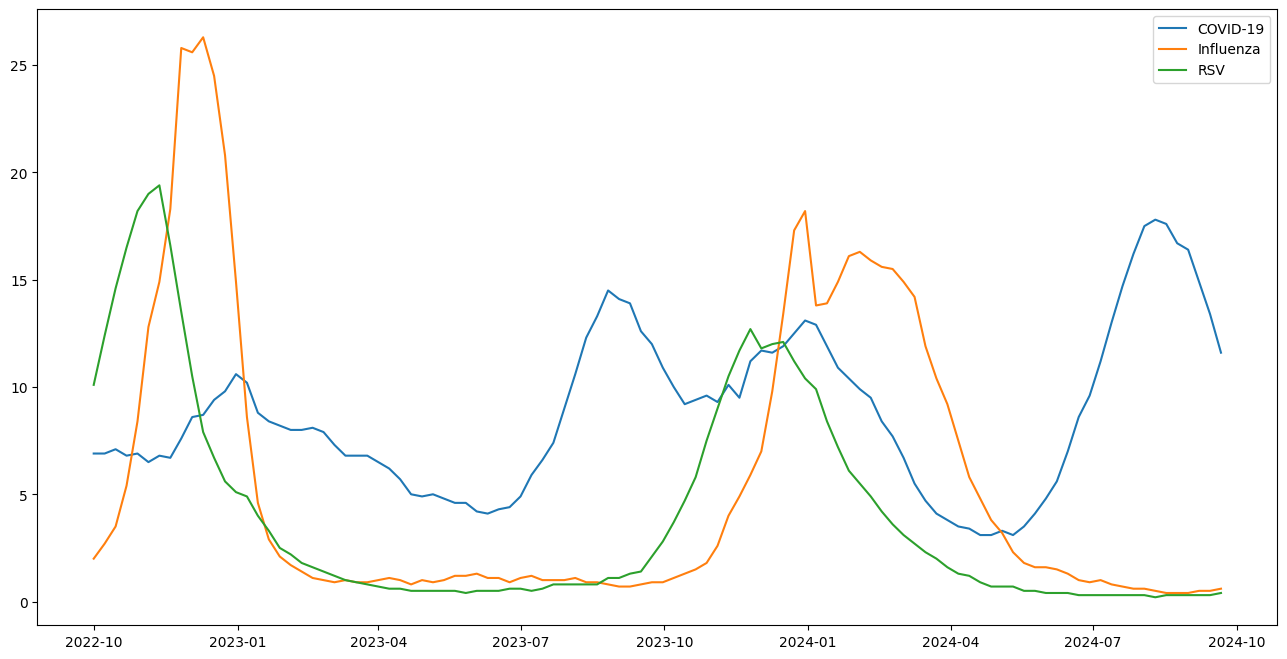

In [32]:
fix, ax= plt.subplots(figsize = (16,8))
ax.plot(test_data)
fig.autofmt_xdate()
plt.legend(['COVID-19','Influenza', 'RSV'], loc='upper right')

# Total Weekly Cases

In [53]:
week_results = client.get("pwn4-m3yp", limit = 100000)

In [54]:
full_data=pd.DataFrame.from_records(week_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(10380, 10)
date_updated           object
state                  object
start_date             object
end_date               object
tot_cases              object
new_cases              object
tot_deaths             object
new_deaths             object
new_historic_cases     object
new_historic_deaths    object
dtype: object


Index(['date_updated', 'state', 'start_date', 'end_date', 'tot_cases',
       'new_cases', 'tot_deaths', 'new_deaths', 'new_historic_cases',
       'new_historic_deaths'],
      dtype='object')

In [55]:
full_data=full_data.astype({'new_cases' : 'float64'})
full_data['week']=pd.to_datetime(full_data['end_date'])
case_data= full_data.drop(columns = ['end_date','start_date']).set_index('week').pivot(columns = 'state', values='new_cases')
case_data['total']=case_data.sum(axis=1)

In [57]:
case_data=case_data.loc[:'2022-01-26']

In [58]:
case_data.shape

(106, 61)

In [59]:
total_case_data=pd.DataFrame(case_data.iloc[:,60])
total_case_data.rename(columns={'total':'confirmed_cases'},inplace=True)
total_case_data.head()

,confirmed_cases
week,
2020-01-22,6.0
2020-01-29,5.0
2020-02-05,12.0
2020-02-12,13.0
2020-02-19,16.0


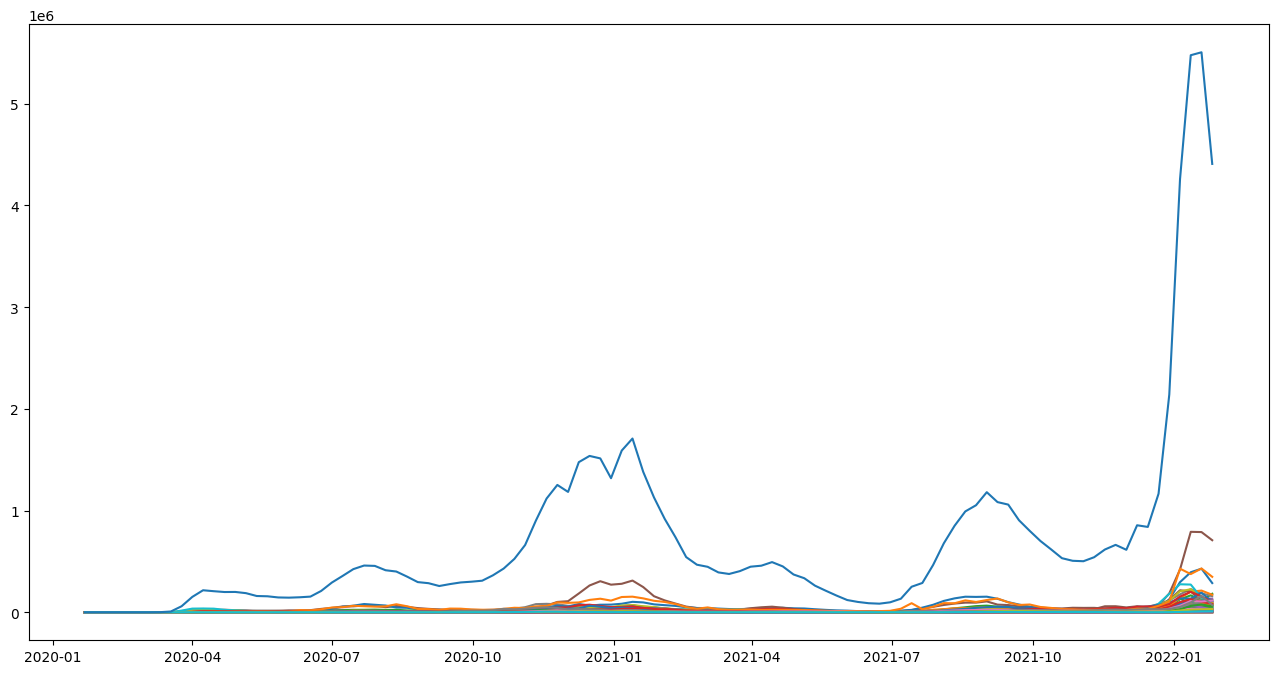

In [60]:
fix, ax= plt.subplots(figsize = (16,8))
ax.plot(case_data)
fig.autofmt_xdate()

# Wastewater

In [40]:
week_results = client.get("g653-rqe2", limit = 300000)

In [41]:
full_data=pd.DataFrame.from_records(week_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(224248, 4)
key_plot_id      object
date             object
pcr_conc_lin     object
normalization    object
dtype: object


Index(['key_plot_id', 'date', 'pcr_conc_lin', 'normalization'], dtype='object')

In [42]:
full_data['normalization'].unique()

array(['flow-population', 'microbial'], dtype=object)

In [43]:
full_data.head()

,key_plot_id,date,pcr_conc_lin,normalization
0,NWSS_mi_889_Before treatment plant_122_raw was...,2022-08-08,108205444.30383627,flow-population
1,NWSS_mi_889_Before treatment plant_122_raw was...,2022-08-10,146710661.49576557,flow-population
2,NWSS_mi_889_Before treatment plant_122_raw was...,2022-08-15,142685314.13387287,flow-population
3,NWSS_mi_889_Before treatment plant_122_raw was...,2022-08-17,117230139.89728022,flow-population
4,NWSS_mi_889_Before treatment plant_122_raw was...,2022-08-22,69845709.54037371,flow-population


In [44]:
full_data=full_data[(full_data['normalization'] == 'flow-population')]
full_data=full_data.astype({'pcr_conc_lin' : 'float64'})
full_data['log_concen']=np.log(full_data['pcr_conc_lin'])
full_data['week']=pd.to_datetime(full_data['date'])
water_data= full_data.drop(columns = ['normalization']).set_index('week').pivot(columns = 'key_plot_id', values='pcr_conc_lin')

In [45]:
water_data.head()

key_plot_id,CDC_VERILY_ak_1490_Treatment plant_raw wastewater,CDC_VERILY_ak_1491_Treatment plant_raw wastewater,CDC_VERILY_ak_2633_Treatment plant_post grit removal,CDC_VERILY_ak_2844_Treatment plant_raw wastewater,CDC_VERILY_al_2510_Treatment plant_post grit removal,CDC_VERILY_al_2629_Treatment plant_post grit removal,CDC_VERILY_ar_1542_Treatment plant_post grit removal,CDC_VERILY_ar_1543_Treatment plant_raw wastewater,CDC_VERILY_ar_1546_Treatment plant_raw wastewater,CDC_VERILY_ar_2507_Treatment plant_raw wastewater,...,NWSS_wv_91_Treatment plant_raw wastewater,NWSS_wv_961_Treatment plant_raw wastewater,NWSS_wy_2625_Treatment plant_raw wastewater,NWSS_wy_2626_Treatment plant_raw wastewater,NWSS_wy_2627_Treatment plant_raw wastewater,NWSS_wy_2628_Treatment plant_raw wastewater,NWSS_wy_2721_Treatment plant_raw wastewater,NWSS_wy_2732_Treatment plant_raw wastewater,NWSS_wy_2740_Treatment plant_raw wastewater,NWSS_wy_2855_Treatment plant_raw wastewater
week,,,,,,,,,,,,,,,,,,,,,
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
na_counts=water_data.isna().sum()
const_sites=list(na_counts.nsmallest(10).index)
print(na_counts.nsmallest(10))

key_plot_id
NWSS_wv_2558_Treatment plant_raw wastewater      388
NWSS_mi_799_Treatment plant_post grit removal    391
NWSS_mi_762_Treatment plant_post grit removal    425
NWSS_mi_757_Treatment plant_post grit removal    517
NWSS_nv_554_Treatment plant_90_raw wastewater    523
NWSS_mi_761_Treatment plant_post grit removal    533
NWSS_mi_800_Treatment plant_raw wastewater       552
NWSS_wi_231_Treatment plant_raw wastewater       642
NWSS_wv_2562_Treatment plant_raw wastewater      793
NWSS_wv_2553_Treatment plant_raw wastewater      810
dtype: int64


In [47]:
water_data_c=water_data[water_data.columns.intersection(const_sites)]
water_data_c.head()

key_plot_id,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_761_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wi_231_Treatment plant_raw wastewater,NWSS_wv_2553_Treatment plant_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater
week,,,,,,,,,,
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


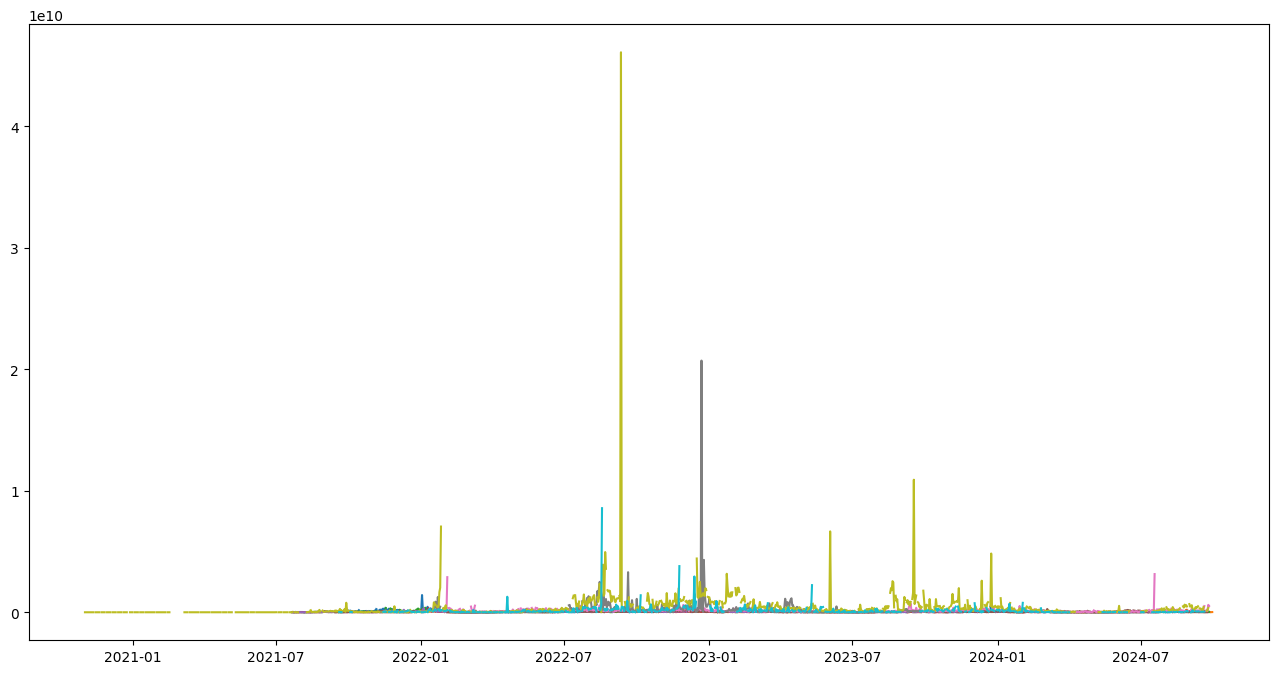

In [48]:
fix, ax= plt.subplots(figsize = (16,8))
ax.plot(water_data_c)
fig.autofmt_xdate()

# Join tables together into dataset

In [49]:
agg_data= water_data_c.merge(total_case_data, on='week', how = 'outer').merge(covid_test_data, on='week',how='outer')\
.merge(covid_rate_data, on='week',how='outer').merge(covid_er_data, on='week', how='outer').merge(us_data, on='week', how='outer').dropna(how='all')
print(agg_data.shape)
agg_data.head()

(1456, 15)


,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_761_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wi_231_Treatment plant_raw wastewater,NWSS_wv_2553_Treatment plant_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater,confirmed_cases,CTK_pos,COVID-NET,ER_adm,New_COVID_7DayADM_rate
week,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN


In [50]:
agg_data.corr()

,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_761_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wi_231_Treatment plant_raw wastewater,NWSS_wv_2553_Treatment plant_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater,confirmed_cases,CTK_pos,COVID-NET,ER_adm,New_COVID_7DayADM_rate
NWSS_mi_757_Treatment plant_post grit removal,1.000000,0.583529,0.562642,0.430858,0.490911,-0.019142,0.233856,0.048216,0.016619,0.077595,0.401071,0.265857,0.552632,0.495149,0.411657
NWSS_mi_761_Treatment plant_post grit removal,0.583529,1.000000,0.557956,0.493775,0.453833,0.069762,0.176987,0.239018,0.184803,0.202351,0.792748,0.306692,0.509091,0.486459,0.441866
NWSS_mi_762_Treatment plant_post grit removal,0.562642,0.557956,1.000000,0.464787,0.547590,0.083991,0.225203,0.125104,0.023131,0.028684,0.332699,0.188045,0.619086,0.565253,0.420620
NWSS_mi_799_Treatment plant_post grit removal,0.430858,0.493775,0.464787,1.000000,0.454112,0.147657,0.173436,0.063484,0.128692,0.102431,0.423485,0.407086,0.406051,0.586449,0.214592
NWSS_mi_800_Treatment plant_raw wastewater,0.490911,0.453833,0.547590,0.454112,1.000000,0.139207,0.202790,0.230677,0.111201,0.138115,0.732593,0.153690,0.486324,0.456578,0.363639
NWSS_nv_554_Treatment plant_90_raw wastewater,-0.019142,0.069762,0.083991,0.147657,0.139207,1.000000,0.024664,0.147225,0.061187,0.074205,-0.014847,0.011533,-0.021000,0.150692,-0.049409
NWSS_wi_231_Treatment plant_raw wastewater,0.233856,0.176987,0.225203,0.173436,0.202790,0.024664,1.000000,0.147356,0.031553,0.058019,NaN,0.410001,0.519963,0.620510,0.373529
NWSS_wv_2553_Treatment plant_raw wastewater,0.048216,0.239018,0.125104,0.063484,0.230677,0.147225,0.147356,1.000000,0.264334,0.273096,0.750211,-0.058212,0.299574,0.186444,0.323445
NWSS_wv_2558_Treatment plant_raw wastewater,0.016619,0.184803,0.023131,0.128692,0.111201,0.061187,0.031553,0.264334,1.000000,0.078344,0.435871,0.003370,-0.057882,0.163794,-0.122818
NWSS_wv_2562_Treatment plant_raw wastewater,0.077595,0.202351,0.028684,0.102431,0.138115,0.074205,0.058019,0.273096,0.078344,1.000000,0.693207,0.973825,0.154732,0.796390,1.000000


In [51]:
agg_data.to_csv('C:/Users/matth/OneDrive/Documents/Projects/Science/Sentinel/COVID tracker/aggregated_covid_data.csv',sep='|')